P.S. & Data: "https://www.hackerearth.com/challenges/competitive/airplane-accident-severity-hackerearth-machine-learning-challenge/"

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
train=pd.read_csv('train.csv')

In [10]:
test=pd.read_csv('test.csv')


In [11]:
train.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [12]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

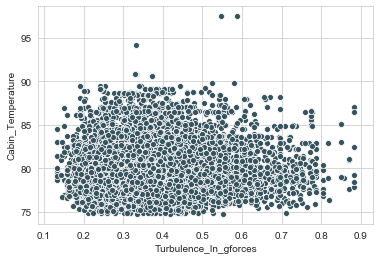

In [13]:
sns.scatterplot('Turbulence_In_gforces','Cabin_Temperature',data=train)

In [14]:
train1=train.copy()

In [15]:
train1.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


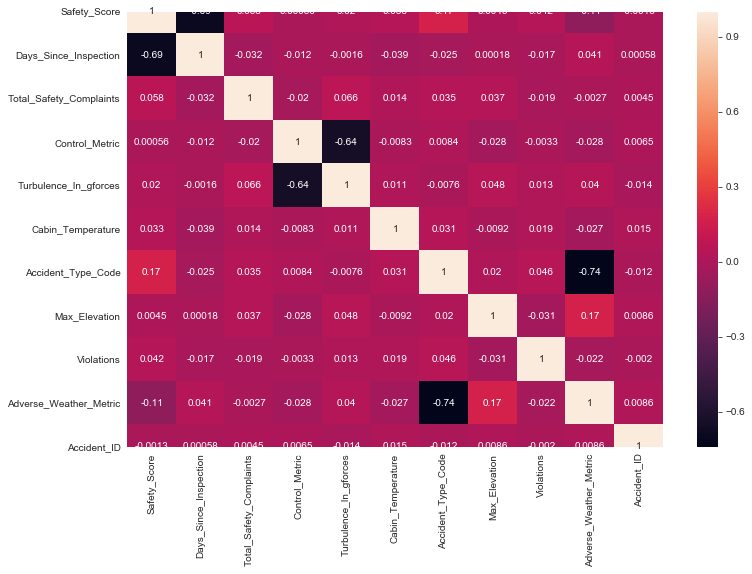

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(train1.corr(),annot=True)

In [17]:
X=train.drop(['Severity','Accident_ID'],axis=1)
y=train['Severity']

In [18]:
from sklearn.ensemble import ExtraTreesClassifier

In [19]:
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, y)
print(model.feature_importances_)

[0.22023465 0.16645155 0.0485257  0.15453568 0.07146844 0.05414667
 0.11232943 0.05052138 0.03455459 0.0872319 ]


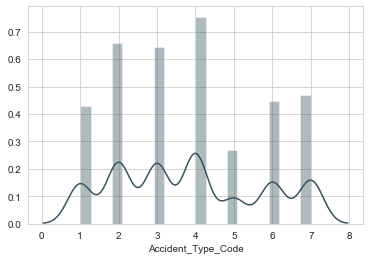

In [20]:
sns.distplot(train['Accident_Type_Code'],hist=True)


In [21]:
def detect_outlier(data,col):
    q1, q3= np.percentile(data[col],[25,75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return lower_bound,upper_bound
    

In [22]:
def detect_outlier_map(data,col):
    q1, q3= np.percentile(data[col],[25,75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    s1=data[data[col]<lower_bound]
    s2=data[data[col]>upper_bound]
    g1=data.groupby("Accident_Type_Code").mean()
    
    
    maping={1:g1[col][1],2:g1[col][2],3:g1[col][3],4:g1[col][4],5:g1[col][5],6:g1[col][6],7:g1[col][7]}
    for dat in [s1]:
        dat[col]=dat['Accident_Type_Code'].map(maping)
    for dat in [s2]:
        dat[col]=dat['Accident_Type_Code'].map(maping)
    data.update(s1)
    data.update(s2)
    print('Lower bound:',lower_bound)
    print('Upper Bound:',upper_bound)
    print('Dataframe Succesfully updated')

In [23]:
train.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


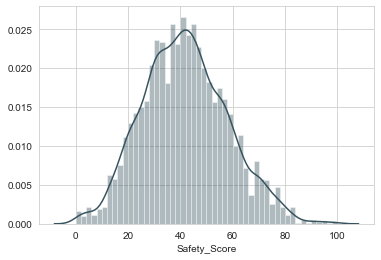

In [24]:
sns.distplot(train['Safety_Score'])

In [25]:
detect_outlier_map(train,'Safety_Score')

Lower bound: -2.283105022830881
Upper Bound: 85.38812785388109
Dataframe Succesfully updated


C:\Users\zeesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


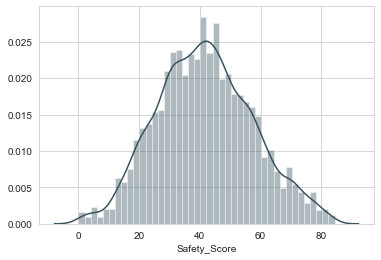

In [26]:
sns.distplot(train['Safety_Score'])

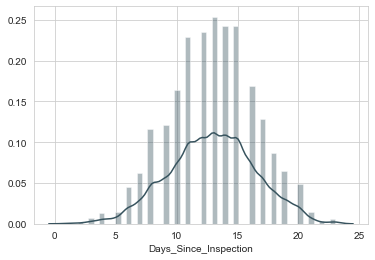

In [27]:
sns.distplot(train['Days_Since_Inspection'])

In [28]:
detect_outlier(train,'Days_Since_Inspection')

(5.0, 21.0)

In [29]:
detect_outlier_map(train,'Days_Since_Inspection')

Lower bound: 5.0
Upper Bound: 21.0
Dataframe Succesfully updated


C:\Users\zeesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\zeesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


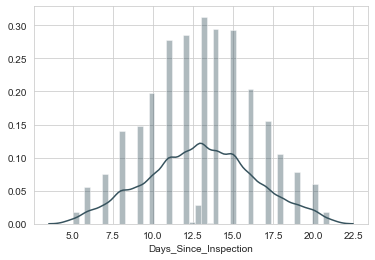

In [30]:
sns.distplot(train['Days_Since_Inspection'])

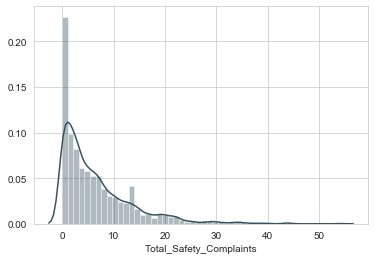

In [31]:
sns.distplot((train['Total_Safety_Complaints']))

In [32]:
detect_outlier(train,'Total_Safety_Complaints')

(-8.5, 19.5)

In [33]:
detect_outlier_map(train,'Total_Safety_Complaints')

Lower bound: -8.5
Upper Bound: 19.5
Dataframe Succesfully updated


C:\Users\zeesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


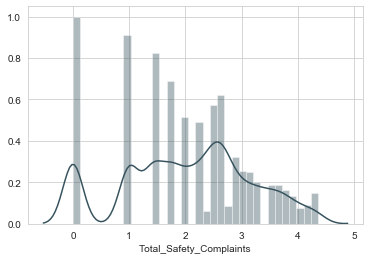

In [34]:
sns.distplot(np.power(train['Total_Safety_Complaints'],0.5))

In [35]:
train.Total_Safety_Complaints=np.power(train['Total_Safety_Complaints'],0.5)

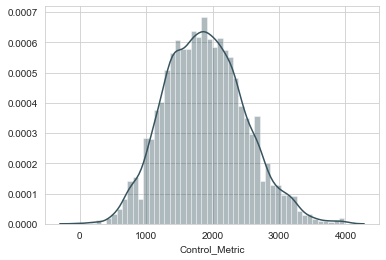

In [36]:
sns.distplot(np.power(train['Control_Metric'],1.8))

In [37]:
detect_outlier(train,'Control_Metric')

(32.31540565177775, 97.94895168641733)

In [38]:
detect_outlier_map(train,'Control_Metric')

Lower bound: 32.31540565177775
Upper Bound: 97.94895168641733
Dataframe Succesfully updated


C:\Users\zeesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\zeesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [39]:
train.Control_Metric=np.power(train['Control_Metric'],1.8)

In [40]:
train.columns

Index(['Severity', 'Safety_Score', 'Days_Since_Inspection',
       'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces',
       'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation',
       'Violations', 'Adverse_Weather_Metric', 'Accident_ID'],
      dtype='object')

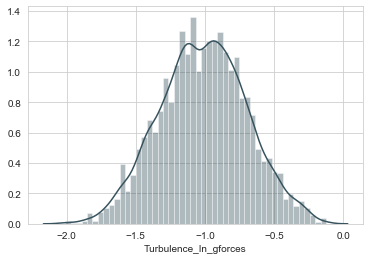

In [41]:
sns.distplot(np.log(train['Turbulence_In_gforces']))

In [42]:
detect_outlier(train,'Turbulence_In_gforces')

(0.05714280562567631, 0.6878676523620629)

In [43]:
detect_outlier_map(train,'Turbulence_In_gforces')

Lower bound: 0.05714280562567631
Upper Bound: 0.6878676523620629
Dataframe Succesfully updated


C:\Users\zeesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


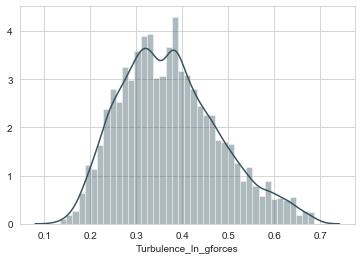

In [44]:
sns.distplot(train['Turbulence_In_gforces'])

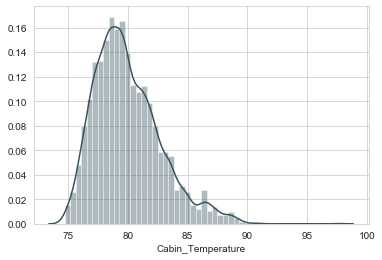

In [45]:
sns.distplot(train['Cabin_Temperature'])

In [46]:
detect_outlier(train,'Cabin_Temperature')

(72.55999999999997, 86.96000000000001)

In [47]:
detect_outlier_map(train,'Cabin_Temperature')

Lower bound: 72.55999999999997
Upper Bound: 86.96000000000001
Dataframe Succesfully updated


C:\Users\zeesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


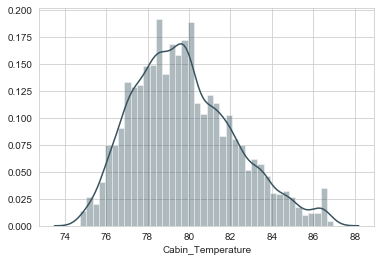

In [48]:
sns.distplot(train['Cabin_Temperature'])

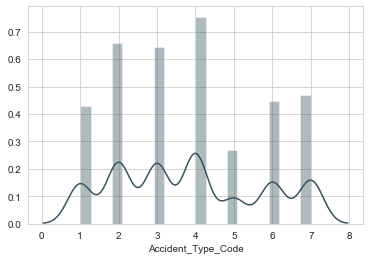

In [49]:
sns.distplot(train['Accident_Type_Code'])

In [50]:
detect_outlier(train,'Accident_Type_Code')
#No outlier present in this Column

(-2.5, 9.5)

In [51]:
train.columns

Index(['Severity', 'Safety_Score', 'Days_Since_Inspection',
       'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces',
       'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation',
       'Violations', 'Adverse_Weather_Metric', 'Accident_ID'],
      dtype='object')

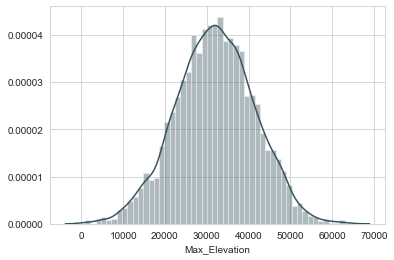

In [52]:
sns.distplot(train['Max_Elevation'])

In [53]:
detect_outlier(train,'Max_Elevation')

(6823.13000087094, 57315.148420441954)

In [54]:
detect_outlier_map(train,'Max_Elevation')

Lower bound: 6823.13000087094
Upper Bound: 57315.148420441954
Dataframe Succesfully updated


C:\Users\zeesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\zeesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


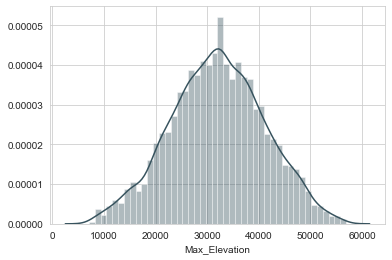

In [55]:
sns.distplot(train['Max_Elevation'])

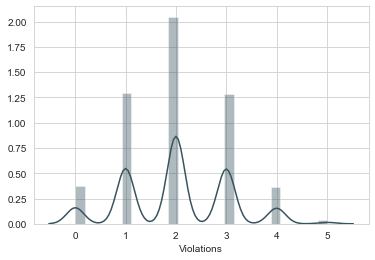

In [56]:
sns.distplot(train['Violations'])

In [57]:
detect_outlier(train,'Violations')

(-2.0, 6.0)

In [58]:
train[train['Violations']>6]
#No outlier in this column

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID


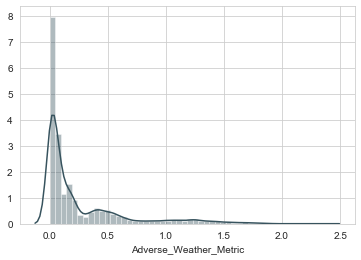

In [59]:
sns.distplot(train['Adverse_Weather_Metric'])

In [60]:
detect_outlier(train,'Adverse_Weather_Metric')

(-0.5009306335006166, 0.8670520124652341)

In [61]:
detect_outlier_map(train,'Adverse_Weather_Metric')

Lower bound: -0.5009306335006166
Upper Bound: 0.8670520124652341
Dataframe Succesfully updated


C:\Users\zeesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


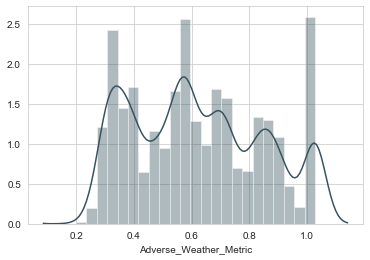

In [62]:
sns.distplot(np.power(train['Adverse_Weather_Metric'],0.2))

In [63]:
train['Adverse_Weather_Metric']=np.power(train['Adverse_Weather_Metric'],0.2)

In [64]:
train.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14.0,2.591809,2164.712505,0.272118,78.04,2.0,31335.476824,3.0,0.842452,7570.0
1,Minor_Damage_And_Injuries,62.465753,10.0,2.591809,2219.830466,0.423939,84.54,2.0,26024.711057,2.0,0.811699,12128.0
2,Significant_Damage_And_Fatalities,63.059361,13.0,4.000000,1903.112900,0.322604,78.86,7.0,39269.053927,3.0,0.320161,2181.0
3,Significant_Damage_And_Serious_Injuries,48.082192,11.0,3.000000,2355.137104,0.337029,81.79,3.0,42771.499200,1.0,0.733087,5946.0
4,Significant_Damage_And_Fatalities,26.484018,13.0,2.519785,1060.235666,0.541140,77.16,3.0,35509.228515,2.0,0.707192,9054.0


In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
train.columns

Index(['Severity', 'Safety_Score', 'Days_Since_Inspection',
       'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces',
       'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation',
       'Violations', 'Adverse_Weather_Metric', 'Accident_ID'],
      dtype='object')

In [67]:
col_names=['Control_Metric','Max_Elevation']

In [68]:
features = train[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

In [69]:
train[col_names]= features


In [70]:
train.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14.0,2.591809,0.478157,0.272118,78.04,2.0,-0.076142,3.0,0.842452,7570.0
1,Minor_Damage_And_Injuries,62.465753,10.0,2.591809,0.572826,0.423939,84.54,2.0,-0.660903,2.0,0.811699,12128.0
2,Significant_Damage_And_Fatalities,63.059361,13.0,4.000000,0.028841,0.322604,78.86,7.0,0.797411,3.0,0.320161,2181.0
3,Significant_Damage_And_Serious_Injuries,48.082192,11.0,3.000000,0.805225,0.337029,81.79,3.0,1.183060,1.0,0.733087,5946.0
4,Significant_Damage_And_Fatalities,26.484018,13.0,2.519785,-1.418861,0.541140,77.16,3.0,0.383423,2.0,0.707192,9054.0


In [71]:
X=train.drop(['Severity','Accident_ID'],axis=1)

In [72]:
y=train['Severity']

In [73]:
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, y)
print(model.feature_importances_)

[0.21753188 0.1499396  0.05192826 0.13887415 0.06899419 0.05839103
 0.13195305 0.05449163 0.03927778 0.08861841]


> Test Data

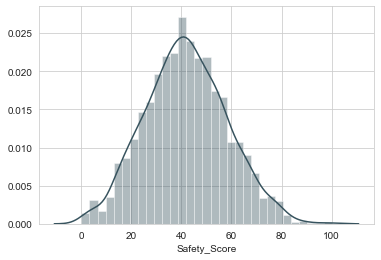

In [74]:
sns.distplot(test.Safety_Score)

In [75]:
detect_outlier(test,'Safety_Score')

(-2.642694063926811, 85.9874429223743)

In [76]:
detect_outlier_map(test,'Safety_Score')

Lower bound: -2.642694063926811
Upper Bound: 85.9874429223743
Dataframe Succesfully updated


C:\Users\zeesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


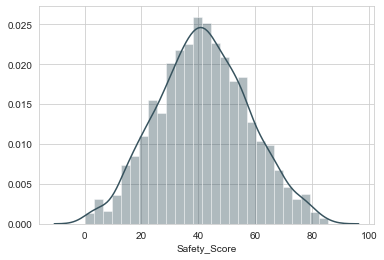

In [77]:
sns.distplot(test.Safety_Score)

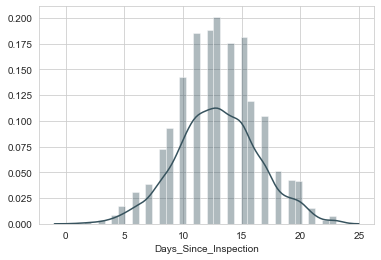

In [78]:
sns.distplot(test['Days_Since_Inspection'])

In [79]:
detect_outlier(test,'Days_Since_Inspection')

(5.0, 21.0)

In [80]:
detect_outlier_map(test,'Days_Since_Inspection')

Lower bound: 5.0
Upper Bound: 21.0
Dataframe Succesfully updated


C:\Users\zeesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\zeesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


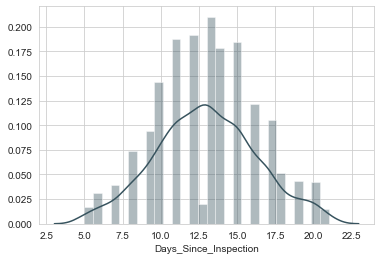

In [81]:
sns.distplot(test['Days_Since_Inspection'])

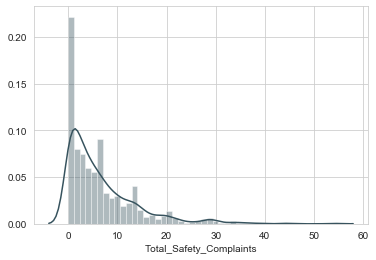

In [82]:
sns.distplot(test['Total_Safety_Complaints'])

In [83]:
detect_outlier(test,'Total_Safety_Complaints')

(-11.0, 21.0)

In [84]:
detect_outlier_map(test,'Total_Safety_Complaints')

Lower bound: -11.0
Upper Bound: 21.0
Dataframe Succesfully updated


C:\Users\zeesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [85]:
test['Total_Safety_Complaints']=np.power(test['Total_Safety_Complaints'],0.30)

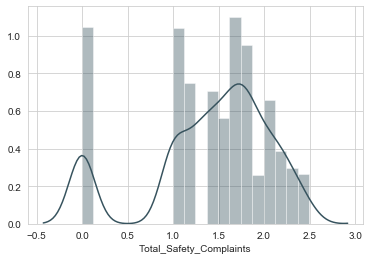

In [86]:
sns.distplot(test['Total_Safety_Complaints'])

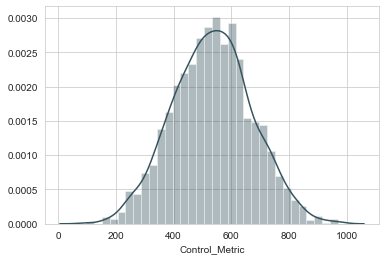

In [87]:
sns.distplot(np.power(test['Control_Metric'],1.5))

In [88]:
detect_outlier(test,'Control_Metric')

(34.57725615314493, 96.24544211485872)

In [89]:
detect_outlier_map(test,'Control_Metric')

Lower bound: 34.57725615314493
Upper Bound: 96.24544211485872
Dataframe Succesfully updated


C:\Users\zeesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\zeesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [90]:
test.Control_Metric=np.power(test['Control_Metric'],1.5)

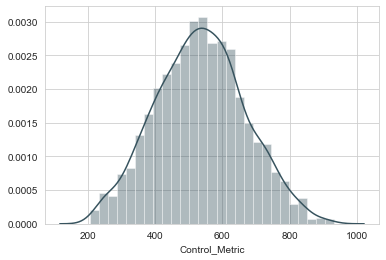

In [91]:
sns.distplot(test['Control_Metric'])

In [92]:
train.columns

Index(['Severity', 'Safety_Score', 'Days_Since_Inspection',
       'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces',
       'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation',
       'Violations', 'Adverse_Weather_Metric', 'Accident_ID'],
      dtype='object')

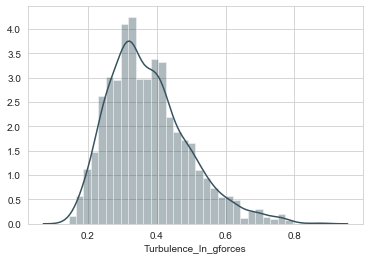

In [93]:
sns.distplot(test['Turbulence_In_gforces'])

In [94]:
detect_outlier(test,'Turbulence_In_gforces')

(0.06890804183195148, 0.6653739632167321)

In [95]:
detect_outlier_map(test,'Turbulence_In_gforces')

Lower bound: 0.06890804183195148
Upper Bound: 0.6653739632167321
Dataframe Succesfully updated


C:\Users\zeesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [96]:
test.Turbulence_In_gforces=np.power(test['Turbulence_In_gforces'],0.2)

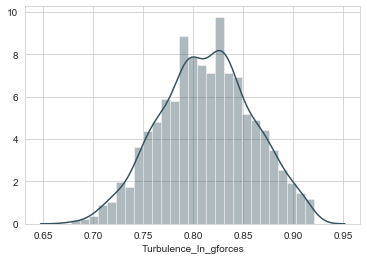

In [97]:
sns.distplot(test['Turbulence_In_gforces'])

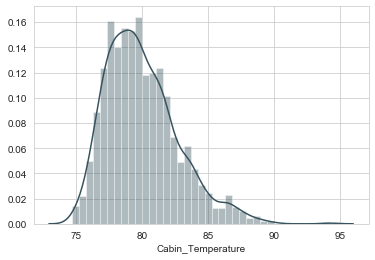

In [98]:
sns.distplot(test['Cabin_Temperature'])

In [99]:
detect_outlier(test,'Cabin_Temperature')

(72.53000000000002, 86.92999999999999)

In [100]:
detect_outlier_map(test,'Cabin_Temperature')

Lower bound: 72.53000000000002
Upper Bound: 86.92999999999999
Dataframe Succesfully updated


C:\Users\zeesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [101]:
test.Cabin_Temperature=np.power(test['Cabin_Temperature'],0.5)

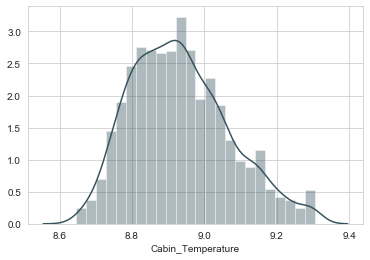

In [102]:
sns.distplot(test['Cabin_Temperature'])

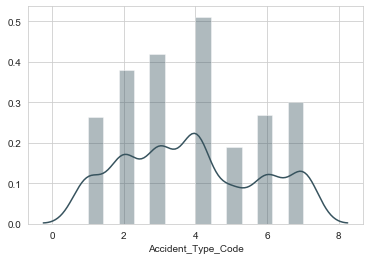

In [103]:
sns.distplot(test['Accident_Type_Code'])

In [104]:
detect_outlier(train,'Accident_Type_Code')
#No outlier present in this Column

(-2.5, 9.5)

In [105]:
train.columns

Index(['Severity', 'Safety_Score', 'Days_Since_Inspection',
       'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces',
       'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation',
       'Violations', 'Adverse_Weather_Metric', 'Accident_ID'],
      dtype='object')

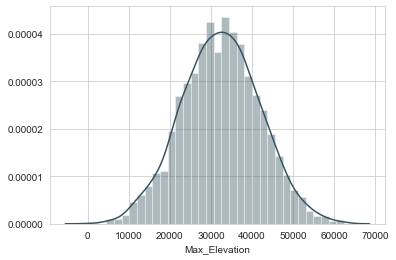

In [106]:
sns.distplot(test['Max_Elevation'])

In [107]:
detect_outlier(test,'Max_Elevation')

(6882.850686636633, 57885.520102140414)

In [108]:
detect_outlier_map(test,'Max_Elevation')

Lower bound: 6882.850686636633
Upper Bound: 57885.520102140414
Dataframe Succesfully updated


C:\Users\zeesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\zeesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


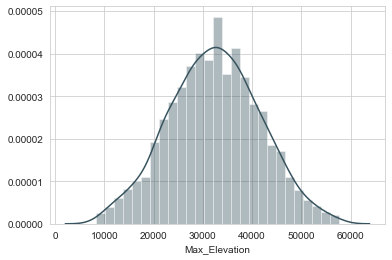

In [109]:
sns.distplot(test['Max_Elevation'])

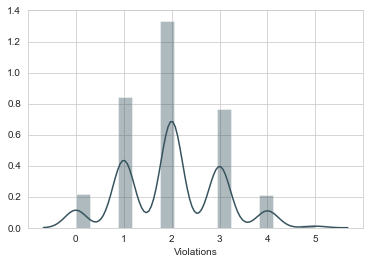

In [110]:
sns.distplot(test['Violations'])

In [111]:
detect_outlier(test,'Violations')

(-2.0, 6.0)

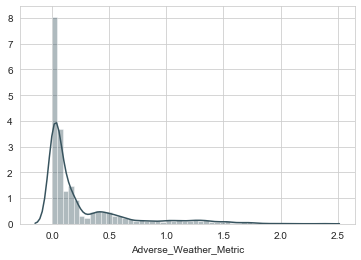

In [112]:
sns.distplot(test['Adverse_Weather_Metric'])

In [113]:
detect_outlier(test,'Adverse_Weather_Metric')

(-0.4402705242792118, 0.7688129782972939)

In [114]:
detect_outlier_map(test,'Adverse_Weather_Metric')

Lower bound: -0.4402705242792118
Upper Bound: 0.7688129782972939
Dataframe Succesfully updated


C:\Users\zeesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [115]:
test.Adverse_Weather_Metric=np.power(test['Adverse_Weather_Metric'],0.25)

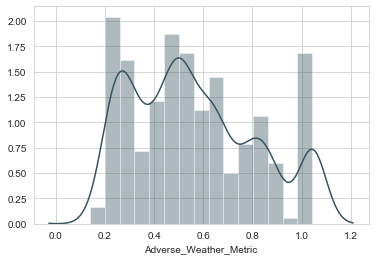

In [116]:
sns.distplot(test['Adverse_Weather_Metric'])

In [117]:
test.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,19.497717,16.0,1.711770,612.867282,0.827905,8.849859,4.0,37949.724386,2.0,0.513803,1.0
1,58.173516,15.0,1.390389,519.038820,0.758367,8.865664,7.0,30194.805567,2.0,0.229567,10.0
2,33.287671,15.0,1.390389,520.688015,0.804342,8.958233,6.0,17572.925484,1.0,0.256319,14.0
3,3.287671,21.0,1.620657,540.613800,0.841426,8.992219,3.0,40209.186341,2.0,0.668732,17.0
4,10.867580,18.0,1.231144,420.273633,0.792816,8.900562,2.0,35495.525408,2.0,0.833956,21.0


In [118]:
col_names

['Control_Metric', 'Max_Elevation']

In [119]:
features = test[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

In [120]:
test[col_names]= features


In [121]:
test.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,19.497717,16.0,1.711770,0.579843,0.827905,8.849859,4.0,0.601619,2.0,0.513803,1.0
1,58.173516,15.0,1.390389,-0.126123,0.758367,8.865664,7.0,-0.237976,2.0,0.229567,10.0
2,33.287671,15.0,1.390389,-0.113714,0.804342,8.958233,6.0,-1.604497,1.0,0.256319,14.0
3,3.287671,21.0,1.620657,0.036207,0.841426,8.992219,3.0,0.846242,2.0,0.668732,17.0
4,10.867580,18.0,1.231144,-0.869233,0.792816,8.900562,2.0,0.335912,2.0,0.833956,21.0


In [122]:
test1=test.drop(['Accident_ID'],1)

In [123]:
test.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,19.497717,16.0,1.711770,0.579843,0.827905,8.849859,4.0,0.601619,2.0,0.513803,1.0
1,58.173516,15.0,1.390389,-0.126123,0.758367,8.865664,7.0,-0.237976,2.0,0.229567,10.0
2,33.287671,15.0,1.390389,-0.113714,0.804342,8.958233,6.0,-1.604497,1.0,0.256319,14.0
3,3.287671,21.0,1.620657,0.036207,0.841426,8.992219,3.0,0.846242,2.0,0.668732,17.0
4,10.867580,18.0,1.231144,-0.869233,0.792816,8.900562,2.0,0.335912,2.0,0.833956,21.0


In [124]:
from sklearn.model_selection import train_test_split

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [126]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [127]:
dt_pre=dt_model.predict(X_test)

In [128]:
from sklearn import metrics
metrics.accuracy_score(dt_pre,y_test)

0.919

In [129]:
from sklearn.metrics import classification_report 
print(classification_report(y_test,dt_pre))

                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.91      0.94      0.92       313
              Minor_Damage_And_Injuries       0.90      0.89      0.90       237
      Significant_Damage_And_Fatalities       0.93      0.88      0.91       168
Significant_Damage_And_Serious_Injuries       0.94      0.94      0.94       282

                               accuracy                           0.92      1000
                              macro avg       0.92      0.91      0.92      1000
                           weighted avg       0.92      0.92      0.92      1000



In [130]:
param_grid={'max_depth': list(range(3, 15)),'criterion':['gini','entropy'],'min_samples_leaf':[2,3,5,6,8],'min_samples_split':[2,4,6,7,8,10]}

In [131]:
from sklearn.model_selection import RandomizedSearchCV

In [132]:
dtcv=RandomizedSearchCV(dt_model,param_grid,n_jobs=-1,n_iter=80,cv=10)

In [133]:
dtcv.fit(X_train,y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
         

In [134]:
dtcv.best_params_

{'min_samples_split': 8,
 'min_samples_leaf': 2,
 'max_depth': 12,
 'criterion': 'entropy'}

In [135]:
dtcv.best_score_

0.9264444444444445

In [136]:
dt_model=DecisionTreeClassifier(min_samples_split=8,
 min_samples_leaf= 3,
 max_leaf_nodes=550,
 max_depth=11,
 criterion= 'entropy')

In [137]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=11, max_features=None, max_leaf_nodes=550,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [138]:
dtc_pre=dt_model.predict(X_test)
metrics.accuracy_score(dtc_pre,y_test)

0.929

In [139]:
print(classification_report(y_test,dtc_pre))

                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.92      0.94      0.93       313
              Minor_Damage_And_Injuries       0.93      0.91      0.92       237
      Significant_Damage_And_Fatalities       0.94      0.92      0.93       168
Significant_Damage_And_Serious_Injuries       0.93      0.93      0.93       282

                               accuracy                           0.93      1000
                              macro avg       0.93      0.93      0.93      1000
                           weighted avg       0.93      0.93      0.93      1000



In [140]:
from sklearn.ensemble import RandomForestClassifier

In [141]:
Ran_model=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)

In [142]:
Ran_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [143]:
ran_pre=Ran_model.predict(X_test)

In [144]:
metrics.accuracy_score(ran_pre,y_test)

0.888

In [145]:
print(classification_report(y_test,ran_pre))

                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.91      0.89      0.90       313
              Minor_Damage_And_Injuries       0.83      0.87      0.85       237
      Significant_Damage_And_Fatalities       0.88      0.86      0.87       168
Significant_Damage_And_Serious_Injuries       0.91      0.91      0.91       282

                               accuracy                           0.89      1000
                              macro avg       0.89      0.88      0.88      1000
                           weighted avg       0.89      0.89      0.89      1000



In [146]:
ran_grid={'n_estimators':[500],
          'criterion':['gini','entropy'],
          'max_depth':[5, 8, 15, 25, 30],
          'min_samples_leaf':[10,50,100,200,500],
         'min_samples_split':[2,5,10,15,100],
         'max_features':np.arange(5,10),
         'bootstrap':[True,False]}

In [147]:
rscv=RandomizedSearchCV(Ran_model,ran_grid,n_jobs=-1,n_iter=40,cv=9)

In [148]:
rscv.fit(X_train,y_train)

RandomizedSearchCV(cv=9, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='entropy',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [149]:
rscv.best_params_

{'n_estimators': 500,
 'min_samples_split': 10,
 'min_samples_leaf': 10,
 'max_features': 9,
 'max_depth': 25,
 'criterion': 'entropy',
 'bootstrap': True}

In [150]:
rscv.best_score_

0.9292222222222222

In [151]:
Ran_model=RandomForestClassifier(n_estimators=450,criterion='entropy',random_state=0,min_samples_split=2,
                                min_samples_leaf=1,max_depth=25,bootstrap=False)

In [152]:
Ran_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=450,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [153]:
rfc_pre=Ran_model.predict(X_test)

In [154]:
metrics.accuracy_score(rfc_pre,y_test)

0.951

In [155]:
print(classification_report(y_test,rfc_pre))

                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.95      0.95      0.95       313
              Minor_Damage_And_Injuries       0.95      0.94      0.94       237
      Significant_Damage_And_Fatalities       0.94      0.95      0.94       168
Significant_Damage_And_Serious_Injuries       0.96      0.96      0.96       282

                               accuracy                           0.95      1000
                              macro avg       0.95      0.95      0.95      1000
                           weighted avg       0.95      0.95      0.95      1000



In [156]:
rfc_test_pred=Ran_model.predict(test1)

In [157]:
pd.DataFrame({'Accident_ID':test.Accident_ID,'Severity':rfc_test_pred}).set_index('Accident_ID').to_csv('rfc111.csv')

In [158]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
xgb1=XGBClassifier()

In [159]:
xgb1.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [160]:
xgb_pred=xgb1.predict(X_test)

In [161]:
metrics.accuracy_score(xgb_pred,y_test)

0.829

In [162]:
optimization_dict = {'max_depth': [2,4,6,10],
                     'n_estimators': [50,100,200,300,1000,3000],
                    'learning_rate':[0.001,0.01,0.05,0.1],
                    'gamma':[0,0.1,0.5,1]}

In [163]:
xgbsearch=RandomizedSearchCV(xgb1,optimization_dict,n_jobs=-1,n_iter=80,cv=10)

In [ ]:
xgbsearch.fit(X_train,y_train)

In [ ]:
xgbsearch.best_params_

In [ ]:
xgbsearch.best_score_

In [ ]:
xgb=XGBClassifier(gamma=0.1,learning_rate=0.1,max_depth=6,n_estimators=1050)

In [ ]:
xgb.fit(X_train,y_train)

In [ ]:
xgb_pre=xgb.predict(X_test)

In [ ]:
metrics.accuracy_score(xgb_pre,y_test)

In [ ]:
xgb_pre_test=xgb.predict(test1)

In [ ]:
pd.DataFrame({'Accident_ID':test.Accident_ID,'Severity':xgb_pre_test}).set_index('Accident_ID').to_csv('xgb222.csv')